# Convert data set into R, G, and B arrays

In [40]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

In [113]:
# input     folder full of forhead images labelled numerically
# output:   three strings
def RGB_channels(frames_source):
   
    filelist = os.listdir(frames_source)
    filelist = sorted(filelist)
    
    R_avg = np.zeros(0, dtype = int) #zeros(len(filelist))
    G_avg = np.zeros(0, dtype = int)
    B_avg = np.zeros(0, dtype = int)

    for filename in filelist:
        if filename.endswith(".png"):
            path_image = os.path.join(frames_source, filename)
            imageRGB = io.imread(path_image)
            imageR = np.zeros(imageRGB.shape, dtype=int)
            imageG = np.zeros(imageRGB.shape, dtype=int)
            imageB = np.zeros(imageRGB.shape, dtype=int)
            imageR[:,:,0] = imageRGB[:,:,0]
            imageG[:,:,1] = imageRGB[:,:,1]
            imageB[:,:,2] = imageRGB[:,:,2]
            
            shape = np.shape(imageR)
            dim = shape[0]*shape[1]
            R_avg = np.append(R_avg, imageR.sum()/dim)
            G_avg = np.append(G_avg, imageG.sum()/dim)
            B_avg = np.append(B_avg, imageB.sum()/dim)
            
            if(filename == "1.png"):
                plt.figure(figsize=(15,6))
                plt.subplot(131) 
                plt.imshow(imageR)
                plt.title('Average red pixel of frame 1 is ' + str(int(R_avg[-1])))
                plt.subplot(132)
                plt.imshow(imageG)
                plt.title('Average green pixel of frame 1 is ' + str(int(G_avg[-1])))
                plt.subplot(133)
                plt.imshow(imageB)
                plt.title('Average blue pixel of frame 1 is ' + str(int(B_avg[-1])))
        
    return R_avg, G_avg, B_avg
            

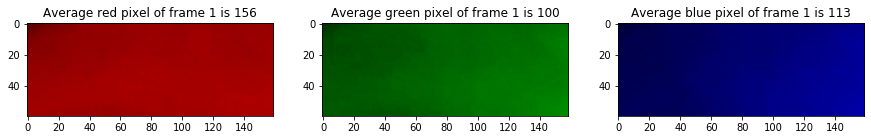

In [114]:
#fill this in with the video to be turned into a forehead video
#run this box
frames_source = "erickson_fps29.784"

Rs, Gs, Bs = RGB_channels(frames_source)